In [1]:
import pandas as pd
import boto3
import numpy as np

In [3]:
bucket_name = 'ml2-group8' # Add your bucket name
file = 'clean_sessions.csv'
s3 = boto3.resource('s3')
bucket = s3.Bucket(bucket_name) 
obj = bucket.Object(key=file) # S3 uses key-value structure where key is your file name
sessions = obj.get()["Body"].read().decode('utf-8') # Read the Body which is the contents of the file.

In [7]:
sessions = sessions.split("\n")
head = sessions[0][1:].split(",")
sessions = sessions[1:]

In [15]:
sessions = [row.split(",")[1:] for row in sessions]

In [18]:
sessions = pd.DataFrame(sessions, columns=head)

## Convert timestamps

In [31]:
sessions["start_timestamp"] = pd.to_datetime(sessions["start_timestamp"])

## Get weeks

In [67]:
sessions.start_timestamp.min()

Timestamp('2018-10-01 07:00:04.526000')

In [68]:
sessions.start_timestamp.max()

Timestamp('2018-12-14 23:59:59.484000')

In [61]:
week1 = sessions[sessions["start_timestamp"] < "2018-10-08 00:00:00.000"]
week2 = sessions[(sessions["start_timestamp"] >= "2018-10-08 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-10-15 00:00:00.000")]
week3 = sessions[(sessions["start_timestamp"] >= "2018-10-15 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-10-22 00:00:00.000")]
week4 = sessions[(sessions["start_timestamp"] >= "2018-10-22 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-10-29 00:00:00.000")]
week5 = sessions[(sessions["start_timestamp"] >= "2018-10-29 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-11-05 00:00:00.000")]
week6 = sessions[(sessions["start_timestamp"] >= "2018-11-05 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-11-12 00:00:00.000")]
week7 = sessions[(sessions["start_timestamp"] >= "2018-11-12 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-11-19 00:00:00.000")]
week7 = sessions[(sessions["start_timestamp"] >= "2018-11-19 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-11-26 00:00:00.000")]
week8 = sessions[(sessions["start_timestamp"] >= "2018-11-26 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-12-01 00:00:00.000")]
week9 = sessions[(sessions["start_timestamp"] >= "2018-12-01 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-12-08 00:00:00.000")]
week10 = sessions[(sessions["start_timestamp"] >= "2018-12-08 00:00:00.000") & 
                 (sessions["start_timestamp"] < "2018-12-15 00:00:00.000")]

In [62]:
weeks = [week1, week2, week3, week4, week5, week6, week7, week8, week9, week10]

In [72]:
weekly_counts = pd.DataFrame(sessions.user_id_hash.unique(), columns=["user_id_hash"])

In [73]:
for i in range(len(weeks)):
    count = weeks[i][["user_id_hash", "session_index"]].groupby("user_id_hash").count()
    count.columns = [f"Week_{i+1}_Count"]
    weekly_counts = weekly_counts.join(count, on="user_id_hash", how="left")

In [74]:
weekly_counts = weekly_counts.fillna(value=0.0)

In [76]:
weekly_counts.to_csv("../data/weekly_counts_per_user.csv")

## Visualize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/weekly_counts_per_user.csv").drop(columns="Unnamed: 0")

In [6]:
weekly_sums = np.sum(df.drop(columns="user_id_hash"), axis=0)

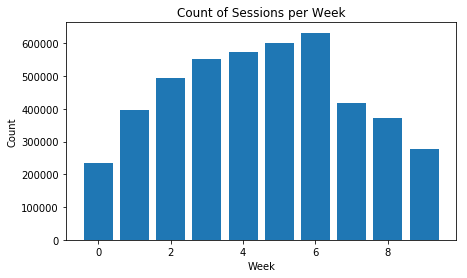

In [151]:
plt.figure(figsize=(7,4))
plt.bar(x=range(len(weekly_sums)), height=weekly_sums)
plt.title("Count of Sessions per Week")
plt.xlabel("Week")
plt.ylabel("Count")
plt.savefig("total_weekly_session.png")
plt.show()

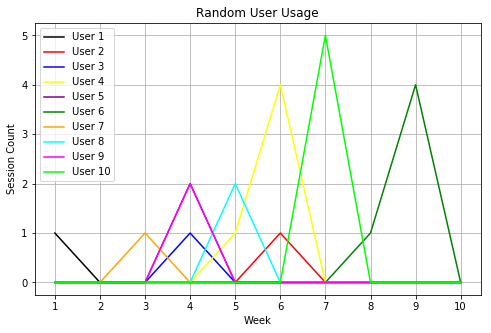

In [150]:
ten_rand_users = df.sample(10)
colors = ["black", "red", "blue", "yellow", "purple", "green", "orange", "cyan", "magenta", "lime"]
plt.figure(figsize=(8,5))
for i in range(len(ten_rand_users)):
    plt.plot(range(1,11), ten_rand_users.iloc[i][1:], color=colors[i], label=f"User {i+1}")
plt.title("Random User Usage")
plt.legend()
plt.xticks(range(1,11))
plt.grid()
plt.xlabel("Week")
plt.ylabel("Session Count")
plt.savefig("random_user_counts.png")
plt.show()